In [1]:
# Prepare weights for non-recursive mean filter:
from array import *
import numpy as np
from numpy import ndarray

b_ = ndarray((10,),float)
# Calculate weights:
b= 1.25
b_[0] = 1
b_[1] = np.power(b,1)
b_[2] = np.power(b,2)
b_[3] = np.power(b,3)
b_[4] = np.power(b,4)
b_[5] = np.power(b,5)
b_[6] = np.power(b,6)
b_[7] = np.power(b,7)
b_[8] = np.power(b,8)
b_[9] = np.power(b,9)

#c= 1 + np.power(b,1) + np.power(b,2) + np.power(b,3) + np.power(b,4) ..... + np.power(b,9)
c_1 = (b_[0] + b_[1] + b_[2] + b_[3] + b_[4] + b_[5] + b_[6]+ b_[7] + b_[8] +  b_[9])
print('c_1 = ',c_1)

c_1 =  33.25290298461914


In [2]:
#import os
#import time
#import re
def measure_internal_temp():
        tempPi = os.popen("vcgencmd measure_temp").readline()
        tempPi = re.sub('[^0-9][^\d]+','', tempPi)       #Strip all non numerical and decimal point from string.

        return (tempPi)
#while True:
        #print(measure_internal_temp())
        #time.sleep(1)

meanB =  18.752357075277015
First order =  0.0008593991458809569
meanC =  18.753162863259703
Second order =  0.013163898508715022
meanD =  18.76550609989217
array_MedianB[5]=  19.0
Countdown:  0
EWMF =  18.716156005859375

TempPi = BLACK
1st order Ea = GREEN
2nd order Eb = RED
3nd order Ec = ORANGE
EWMA = BLUE


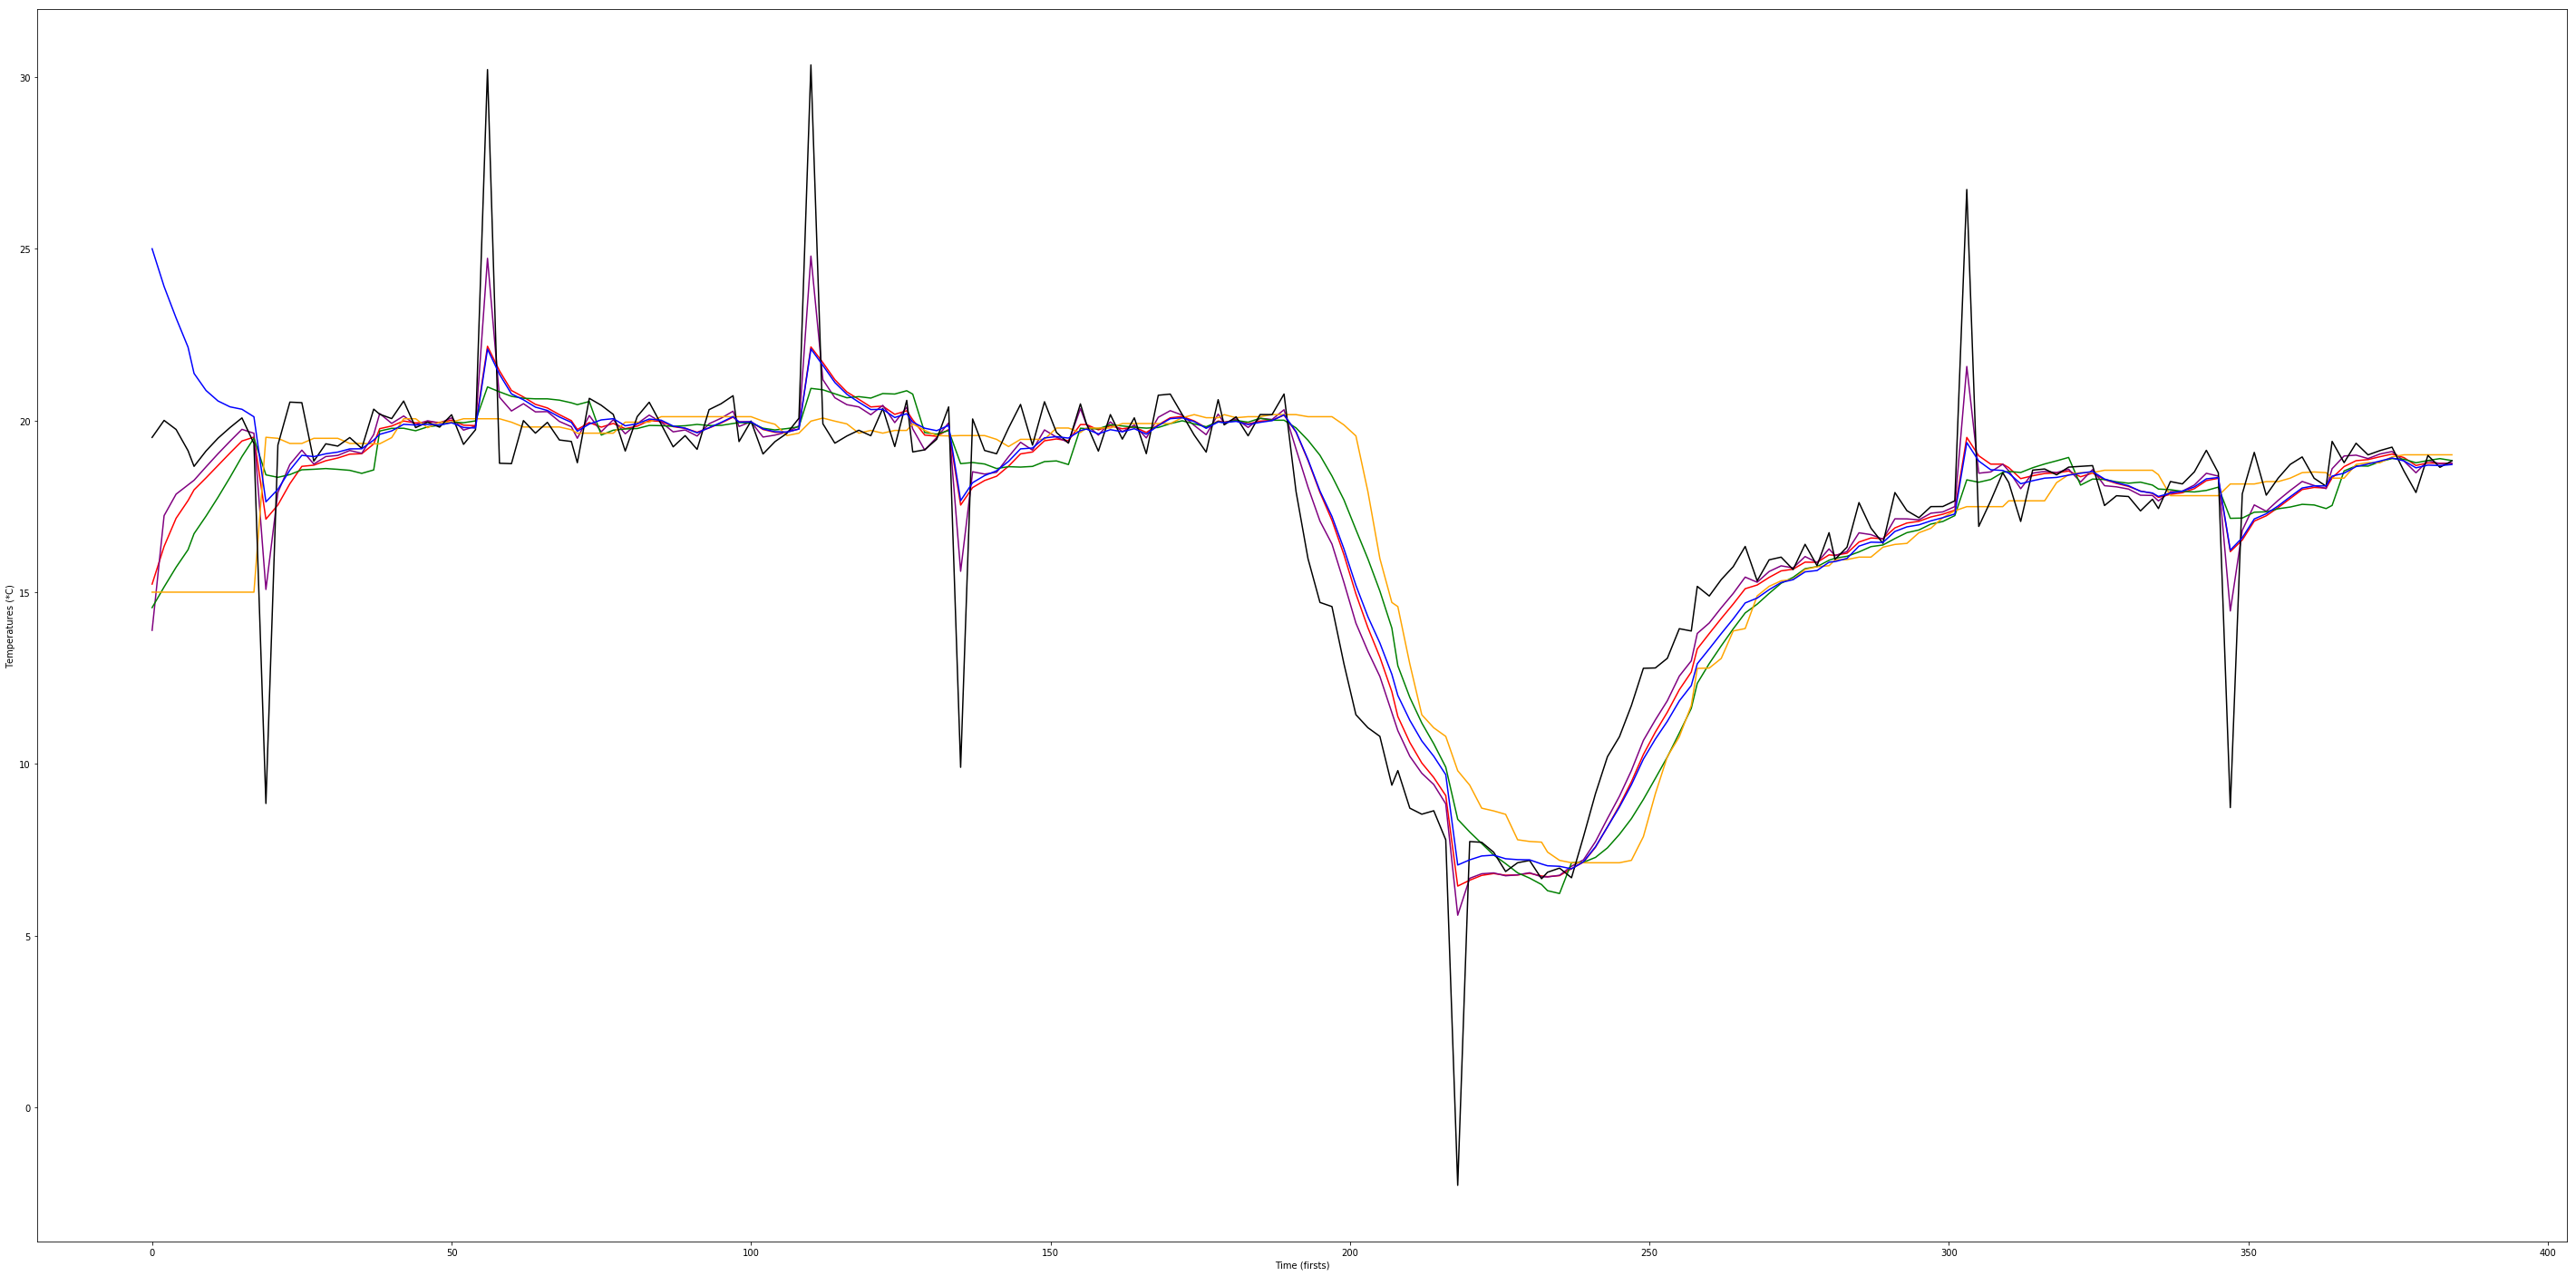

In [6]:
import os
import re
import datetime
import time

# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
from array import *
import matplotlib.pyplot as plt
import random
from w1thermsensor import W1ThermSensor
ds18b20Sensor = W1ThermSensor()

tempDS18B20 = round(ds18b20Sensor.get_temperature(), 8)
#print('tempDS18B20 = ',tempDS18B20)

from IPython.display import display, clear_output
plt.rcParams['figure.figsize'] = [30, 15]

i = 0
DTime = 1
################################################################
n = 200           # Number of readings to take (iterations).
################################################################

now = datetime.datetime.now()

timeStringS = now.strftime("%S")
timeStringM = now.strftime("%M")
timeStringH = now.strftime("%H")
initialIntTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)

print('..... PROCESSING .....')
clear_output(wait=True)

def getSensorData():

    global intTimeString
    global tempPiFloat
    global tPi
    global tempDS18B20
    global temperature
    
    now = datetime.datetime.now()
    timeStringH = now.strftime("%H")
    timeStringS = now.strftime("%S")
    timeStringM = now.strftime("%M")
    intTimeString = int(timeStringS) + (int(timeStringM) * 60) + (int(timeStringH) * 60 * 60)- initialIntTimeString
    
    tempPiFloat = float(measure_internal_temp())
    tempDS18B20 = round(ds18b20Sensor.get_temperature(), 8)
    tempPiFloat = tempDS18B20
    #print('tempDS18B20 = ',tempDS18B20)
    
    # Artificially make the temperature reading more noisy:
    
    tempPiFloat = round (tempPiFloat + (tempPiFloat * random.uniform(-0.05, 0.05)),3)
    
    # Add some random spikes:
    spikeSeed = random.uniform(-1.0, 1.0)
    if (spikeSeed > 0.97) or (spikeSeed < -0.97):
        tempPiFloat = tempPiFloat + spikeSeed*10
        print('Spike seeded !!!!!  ',tempPiFloat)
    temperature = tempPiFloat
    tPi = tempPiFloat
    
    clear_output(wait=True)
    #print()
    time.sleep(DTime)
###############################################################################

array_TempPi = array('f', [])
y = array('f', [])

Va = array('f', [])
Ea = array('f', [])

Vb = array('f', [])
Eb = array('f', [])
Ab = array('f', [])

Ec = array('f', [])
Vc = array('f', [])
Ac = array('f', [])
Hc = array('f', [])

test = array('f', [])
array_MedianA = array('f', [])
array_MedianB = array('f', [])
array_MedianC = array('f', [])
averagingC = array('f', [])
array_meanA = array('f', [])
array_meanB = array('f', [10])
array_meanC = array('f', [])
array_meanD = array('f', [])
array_meanE = array('f', [])
array_Time = array('i', [])

# INITIALISE:
averagingC.append(25)                         # Avoids array shape mismatching.

Va.append(25)
Ea.append(25)

Eb.append(25)
Vb.append(25)
Ab.append(25)

Ec.append(25)
Vc.append(25)
Ac.append(25)
Hc.append(25)
test.append(25)

i = n
# Create some averaging for comparison:
a= 0.1          # Lower is smoother.

prevEcc = 25.0
prevVcc = 0.1
prevAcc = 0.01
prevHcc = 0.01
##########################################################
meanB = 17
meanC = 14
firstOrderMean = 1.0
for h in range(10): 
    array_meanB.append(14)              #Initialise the array with 10 values of '14'.

for x in range(n):
    i = i -1                            # Countdown
    getSensorData()
#######################################################################
#######################################################################
# Calculate a running mean using an sample array of length = 10.
    previousMeanB = meanB
    previousMeanC = meanC
    previousFirstOrderMean = firstOrderMean
    array_meanB[10] = tempPiFloat
    for h in range(10):
        #print('h = ',h)
        array_meanB[h] = array_meanB[(h+1)]            # Shift the values in the array to the left

    meanB = 0
    for h in range(10):
        meanB = array_meanB[h] + meanB                 # Calculate the mean, no weights.
    meanB = meanB/10
    array_meanE.append(meanB)                          # Prepare for printing out graph. GREEN.
    
    meanB = 0
    #print('Array meanB = ',array_meanB)
    for h in range(10):
        meanB = array_meanB[h]*b_[h] + meanB           # Calculate the mean, b_[h] is weights.
    meanB = meanB/(c_1)
    print('meanB = ',meanB)
    array_meanA.append(meanB)                          # Prepare for printing out graph.

    # Velocity (1st order), assuming sensor reading time interval is constant:
    firstOrderMean = meanB - previousMeanB
    print('First order = ',firstOrderMean)
    # Adjust meanB with a weight a:
    a = 0.05
    meanC = meanB + meanB*firstOrderMean*a
    print('meanC = ',meanC)
    array_meanC.append(meanC)                          # Prepare for printing out graph. 
    
    # Acceleration (2nd order), assuming sensor reading time interval is constant:
    secondOrderMean = firstOrderMean - previousFirstOrderMean
    print('Second order = ',secondOrderMean)
    # Adjust meanC with a weight a:
    a = 0.05
    meanD = meanC + meanC*secondOrderMean*a
    print('meanD = ',meanD)
    array_meanD.append(meanD)                          # Prepare for printing out graph.  
    
#######################################################################
#######################################################################
    
    array_MedianA.append((round (tempPiFloat,2)))
    array_TempPi.append(tempPiFloat)
    y.append(tempPiFloat)                       # We ran out of space for long descriptive names!
    array_Time.append(intTimeString)
    
#########################################################
    if (x>9):
        for h in range(10):
            #print('x= ',x)
            #print('h = ',h)
            array_MedianB[h] = array_MedianA[(h-10+x)]
            #print('array_MedianB= ',array_MedianB)

        np.median(array_MedianB, overwrite_input=True)
        print('array_MedianB[5]= ',array_MedianB[5])       # 5 gives the middle of the median array.
        array_MedianC.append(array_MedianB[5]) 
        
    else:
        array_MedianB.append(15.0)        # Initialise the array.
        array_MedianC.append(15.0)        # Initialise the array.
########################################################################
# EWMF:
    a = 0.22                     # Lower value is smoother. Normally 0.1.
    if (x > 0):
        averagingC.append(    (1-a)*averagingC[x-1] + a*y[x]    )  
########################################################################
        
        a = 0.08                                     # Lower value is smoother. Normaly 0.1.
        b = 0.05
        c = 1.0
        d = 10.0
        
        a = 0.08                                     # Lower value is smoother. Normaly 0.1.
        b = 0.08
        c = 1.5
        d = 15.0
        
        #a = 0.08          # Lower is smoother.
        #b = 0.08           # Velocity weight
        #c = 1.5           # Acceleration weight
        #d = 25.0          # Third order weight
        
        # Assume time period is constant.
    # FIRST ORDER:
        # UPDATE:
        Ea.append(   (1-a)*Ea[x-1] + a*(y[x])                    )   # Meaurement
        Va.append(   (1-a)*Va[x-1] + a*(Ea[x] - Ea[x-1])         )   # Velocity (first order)
        # ADJUST:
        if (x < 10):
            Va[x] = 0                    # Wait until 'measuremnt' has stabilised.
        Ea[x] = Ea[x] + Ea[x]*Va[x]*b

    # SECOND ORDER    
        # UPDATE:
        Eb.append(   (1-a)*Eb[x-1] + a*(y[x])                    )   # Meaurement
        Vb.append(   (1-a)*Vb[x-1] + a*(Eb[x] - Eb[x-1])         )   # Velocity (first order)
        Ab.append(   (1-a)*Ab[x-1] + a*(Vb[x] - Vb[x-1])         )   # Acceleration (second order)
        # ADJUST:
        if (x < 10):
            Vb[x] = 0                    # Wait until 'measuremnt' has stabilised.
        Eb[x] = Eb[x] + Eb[x]*Vb[x]*b
        if (x < 20):
            Ab[x] = 0                    # Wait until velocity has stabilised.
        Eb[x] = Eb[x] + Eb[x]*Ab[x]*c     

    # THIRD ORDER    
        # UPDATE:
        Ec.append(   (1-a)*Ec[x-1] + a*(y[x])                    )   # Meaurement
        Vc.append(   (1-a)*Vc[x-1] + a*(Ec[x] - Ec[x-1])         )   # Velocity (first order)
        Ac.append(   (1-a)*Ac[x-1] + a*(Vc[x] - Vc[x-1])         )   # Acceleration (second order)
        Hc.append(   (1-a)*Hc[x-1] + a*(Ac[x] - Ac[x-1])         )   # ? (third order)
        # ADJUST:
        if (x < 10):
            Vc[x] = 0                    # Wait until 'measuremnt' has stabilised.
        Ec[x] = Ec[x] + Ec[x]*Vc[x]*b
        if (x < 20):
            Ac[x] = 0                    # Wait until velocity has stabilised.
        Ec[x] = Ec[x] + Ec[x]*Ac[x]*c    
        if (x < 30):
            Hc[x] = 0                    # Wait until acceleration has stabilised.
        Ec[x] = Ec[x] + Ec[x]*Hc[x]*d   

#########################################################################################
        # INITIALISE:
        if (x == 0):
            prevEcc = 25.0
            prevVcc = 0.1
            prevAcc = 0.01
            prevHcc = 0.001
        # WEIGHTS:
        a = 0.08          # Lower is smoother.
        b = 0.08           # Velocity weight
        c = 1.5           # Acceleration weight
        d = 25.0          # Third order weight
            
        # MEASUREMENT:
        currEcc = (1-a)*prevEcc + a*temperature            # Meaurement
        currVcc = (1-a)*prevVcc + a*(currEcc - prevEcc)    # Velocity (first order)
        currAcc = (1-a)*prevAcc + a*(currVcc - prevVcc)    # Acceleration (second order)
        currHcc = (1-a)*prevHcc + a*(currAcc - prevAcc)    # ? (third order)
        #print('currHcc = ',currHcc)
        
        # ADJUST:
        #print('BeforeVcc = ',currEcc)
        if (x < 10):
            currVcc = 0                    # Wait until 'measuremnt' has stabilised.
        currEcc = currEcc + currEcc*currVcc*b
        #print('AfterVcc  = ',currEcc)
        if (x < 20):
            currAcc = 0                    # Wait until velocity has stabilised.
        currEcc = currEcc + currEcc*currAcc*c  
        #rint('AfterAcc  = ',currEcc)
        if (x < 30):
            currHcc = 0                    # Wait until acceleration has stabilised.
        currEcc = currEcc + currEcc*currHcc*d  
        #print('AfterHcc  = ',currEcc)

        # PREPARE FOR NEXT ITERATION:
        prevEcc = currEcc
        prevVcc = currVcc
        prevAcc = currAcc
        prevHcc = currHcc
        
        #OUTPUT:
        filteredTemperature = currEcc 
#####################################################################################
        test.append(filteredTemperature)
        print('Countdown: ',i)
        print('EWMF = ',averagingC[x])
        #print('  Ea = ',Ea[x])
        #print('  Va = ',Va[x])
        #print('  Eb = ',Eb[x])
        #print('  Vb = ',Vb[x])
        #print('  Ab = ',Ab[x])
        #print('  Ec = ',Ec[x])
        #print('  Vc = ',Vc[x])
        #print('  Ac = ',Ac[x])
        #print('  Hc = ',Hc[x])
        #print('                EWMF = ',averagingC[x])
        #print('                  Ec = ',Ec[x])
        #print('Filtered Temperature = ',filteredTemperature)
        #print('Randomised temp = {}*C'.format(tempPiFloat))
        #print('Original tempDS18B20 = ',tempDS18B20)
            
    else:
        print('Countdown: ',i)
            
# Set the plot size:
plt.rcParams['figure.figsize'] = [50, 25]

plt.plot(array_Time, array_meanA, color='red')
plt.plot(array_Time, array_meanC, color='purple')
#plt.plot(array_Time, array_meanD, color='pink')
plt.plot(array_Time, array_meanE, color='green')
plt.plot(array_Time, array_MedianC, color='orange')
#plt.plot(array_Time, Ea, color='green')
#plt.plot(array_Time, Eb, color='yellow')
#plt.plot(array_Time, Ec, color='orange')
plt.plot(array_Time, array_TempPi, color='black')
#plt.plot(array_Time, yy, color='purple')
plt.plot(array_Time, averagingC, color='blue')
plt.xlabel('Time (firsts)')
plt.ylabel('Temperatures (*C)')

print()
print('TempPi = BLACK')
print('1st order Ea = GREEN')
print('2nd order Eb = RED')
print('3nd order Ec = ORANGE')
print('EWMA = BLUE')


In [ ]:
from IPython.display import display, Math 
display(Math(r'\int_0^1\sin x \;dx'))